# 2.3 GIẢI THUẬT 3: BAYES NGÂY THƠ (NAÏVE BAYES)

## 2.3.1 Ôn tập lý thuyết


---

###  **1. Giải thuật Naive Bayes hoạt động như thế nào?**

Naive Bayes là một thuật toán phân loại dựa trên xác suất, sử dụng **Định lý Bayes** để xác định xác suất một mẫu thuộc vào một lớp nào đó dựa trên các đặc trưng của mẫu.

**Định lý Bayes:**

$$
P(C \mid X) = \frac{P(X \mid C) \cdot P(C)}{P(X)}
$$

Trong đó:

| Ký hiệu               | Ý nghĩa                          |                                                   |
| --------------------- | -------------------------------- | ------------------------------------------------- |
| (C)                   | Lớp cần dự đoán                  |                                                   |
| (X=(x_1,x_2,...,x_n)) | Tập các đặc trưng của mẫu        |                                                   |
| (P(C                  | X))                              | Xác suất mẫu thuộc lớp (C) khi biết đặc trưng (X) |
| (P(C))                | Xác suất tiên nghiệm của lớp     |                                                   |
| (P(X                  | C))                              | Xác suất xuất hiện (X) khi biết lớp (C)           |
| (P(X))                | Xác suất tiên nghiệm của mẫu (X) |                                                   |

#### **Giả định "ngây thơ" (Naive Assumption)**

Naive Bayes giả định rằng *các đặc trưng độc lập với nhau khi biết lớp*:

$$
P(X \mid C) = \prod_{i=1}^{n} P(x_i \mid C)
$$

→ Giúp việc tính toán trở nên đơn giản và nhanh hơn.

---

###  **2. Các loại mô hình Naive Bayes và khi nào sử dụng**

| Mô hình            | Loại dữ liệu                     | Giả định                                | Khi sử dụng                                |
| ------------------ | -------------------------------- | --------------------------------------- | ------------------------------------------ |
| **Gaussian NB**    | Dữ liệu số liên tục              | Mỗi đặc trưng tuân theo phân phối chuẩn | Tuổi, điểm số, thu nhập,...                |
| **Multinomial NB** | Dữ liệu rời rạc dạng đếm (count) | Đặc trưng là số lần xuất hiện           | Phân loại văn bản dựa trên tần suất từ     |
| **Bernoulli NB**   | Dữ liệu nhị phân (0/1)           | Đặc trưng thể hiện sự có / không        | Phân loại văn bản dựa trên sự xuất hiện từ |

---

###  **3. Tại sao gọi là "ngây thơ"? Ảnh hưởng đến hiệu suất**

Naive Bayes được gọi là *"ngây thơ"* vì giả định **mọi đặc trưng độc lập với nhau**, điều này hiếm khi đúng trong thực tế.

* **Ưu điểm:** Tính toán nhanh, đơn giản, hoạt động tốt với dữ liệu nhiều chiều (như văn bản).
* **Hạn chế:** Nếu các đặc trưng có mối quan hệ phụ thuộc mạnh → mô hình có thể giảm độ chính xác.

---

###  **4. So sánh với SVM và Random Forest**

| Tiêu chí                | Naive Bayes       | SVM      | Random Forest         |
| ----------------------- | ----------------- | -------- | --------------------- |
| Tốc độ huấn luyện       | **Rất nhanh**     | Chậm hơn | Trung bình            |
| Dữ liệu nhiều đặc trưng | **Hoạt động tốt** | Tốt      | Tốt                   |
| Học quan hệ phi tuyến   | **Không**         | Có       | Có                    |
| Nguy cơ overfitting     | Thấp              | Có thể   | **Thấp nhờ tập rừng** |
| Dữ liệu văn bản         | **Rất hiệu quả**  | Tốt      | Trung bình            |

---

###  **5. Code mẫu Gaussian Naive Bayes**

```python
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# 1. Chuẩn bị dữ liệu
data = load_iris()
X = data.data
y = data.target

# 2. Chia dữ liệu train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Khởi tạo mô hình
model = GaussianNB()

# 4. Huấn luyện mô hình
model.fit(X_train, y_train)

# 5. Dự đoán
y_pred = model.predict(X_test)

# 6. Đánh giá
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
```

---

###  **6. Xử lý dữ liệu phân loại cho Multinomial Naive Bayes**

Vì Multinomial NB yêu cầu dữ liệu dạng **đếm**, ta cần biến đổi dữ liệu categorical thành số:

| Phương pháp            | Công cụ                                 | Khi dùng                |
| ---------------------- | --------------------------------------- | ----------------------- |
| **Label Encoding**     | `LabelEncoder`                          | Dữ liệu có thứ tự       |
| **One-Hot Encoding**   | `OneHotEncoder`, `pandas.get_dummies()` | Dữ liệu không có thứ tự |
| **Text Vectorization** | `CountVectorizer`, `TfidfVectorizer`    | Phân loại văn bản       |

---

###  **7. Naive Bayes trong phân loại văn bản**

Các bước:

1. Thu thập dữ liệu văn bản + nhãn lớp.
2. Tiền xử lý văn bản (lowercase, bỏ stopwords, stemming/lemmatization).
3. Mã hóa văn bản:

   * `CountVectorizer` → số lần xuất hiện từ
   * `TfidfVectorizer` → trọng số TF-IDF
4. Dùng **MultinomialNB** để huấn luyện và dự đoán.

---


## 2.3.2  Bài làm mẫu

Bài toán 1: Xây dựng mô hình dữ liệu bằng giải thuật Bayes ngây thơ trên tập dữ liệu lấy tại
https://www.kaggle.com/code/zabihullah18/email-spam-detection

**1) Import thư viện và nạp dữ liệu**

In [26]:
# Import thư viện
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Đọc dữ liệu
data = pd.read_csv('spam.csv', encoding='latin-1')

# Hiển thị 5 dòng đầu
data.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**2) Tiền xử lý dữ liệu**

In [27]:
# Xóa các cột không cần thiết
data = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

# Đổi tên cột rõ ràng hơn
data.columns = ['label', 'text']

# Tách đặc trưng (X) và nhãn (y)
X = data['text']
y = data['label']

# Chia train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


**3) Vector hóa dữ liệu text (Bag of Words)**

In [28]:
vectorizer = CountVectorizer()

# Fit + transform tập train
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform tập test
X_test_vectorized = vectorizer.transform(X_test)


**4) Xây dựng và huấn luyện mô hình Naive Bayes**

In [29]:
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)


MultinomialNB()

**5) Dự đoán và đánh giá mô hình**

In [30]:
# Dự đoán nhãn cho tập test
y_pred = classifier.predict(X_test_vectorized)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"📌 Accuracy: {accuracy:.2f}")
print("\n🔹 Confusion Matrix:")
print(conf_matrix)
print("\n🔹 Classification Report:")
print(classification_rep)


📌 Accuracy: 0.98

🔹 Confusion Matrix:
[[963   2]
 [ 16 134]]

🔹 Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115




---

### 📝 **Nhận xét kết quả mô hình Naïve Bayes**

Dựa trên kết quả đánh giá mô hình với **accuracy**, **confusion matrix** và **classification report**, ta nhận thấy mô hình phân loại SPAM – HAM bằng **Multinomial Naïve Bayes** hoạt động khá hiệu quả đối với dữ liệu văn bản.

* **Accuracy đạt cao** (khoảng 0.95 trở lên), cho thấy mô hình dự đoán đúng phần lớn các email.
* **Precision đối với lớp SPAM cao**, điều này chứng tỏ mô hình ít dự đoán nhầm email hợp lệ (HAM) thành SPAM. Đây là điểm rất quan trọng trong bài toán lọc thư rác.
* **Recall của lớp SPAM cũng khá tốt**, nghĩa là mô hình phát hiện được nhiều email rác trong tập kiểm tra.
* Từ **Confusion Matrix**, số lượng email bị phân loại nhầm là **khá thấp**:

  * HAM dự đoán nhầm thành SPAM: nhỏ → giảm nguy cơ mất thư quan trọng.
  * SPAM dự đoán nhầm thành HAM: cũng nhỏ → giảm nguy cơ lọt thư rác.

Tuy nhiên, mô hình vẫn có một số hạn chế:

* Naïve Bayes giả định các từ trong câu độc lập với nhau, trong thực tế điều này **không hoàn toàn đúng**, có thể làm giảm hiệu quả trong câu phức tạp.
* Chưa xử lý tiền xử lý nâng cao như:

  * Loại bỏ stopwords
  * Stemming / Lemmatization
  * Chuyển sang TF-IDF thay vì Count Vectorizer

Nhìn chung, mô hình **Multinomial Naïve Bayes** là **nhanh, đơn giản, nhưng hiệu quả rất tốt** cho bài toán phân loại email SPAM dựa trên nội dung văn bản.

---

## 2.3.3 Bài thực hành số 1 

Xây dựng mô hình Naïve ngây thơ trên tập dữ liệu hành vi của khách hàng lấy tại
https://www.kaggle.com/code/arezalo/customer-behaviour-prediction-naive-bayes

**1. Import thư viện và nạp dữ liệu**

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
# Load dataset
data = pd.read_csv('Customer_Behaviour.csv')

# Hiển thị 5 dòng đầu
data.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**2. Tiền xử lý dữ liệu**

In [33]:
# Mã hóa cột giới tính
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Tách X và y
X = data[['Gender', 'Age', 'EstimatedSalary']]
y = data['Purchased']

# Chia tập Train/Test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


**3. Huấn luyện mô hình Naïve Bayes**

In [34]:
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

**4. Dự đoán & Đánh giá mô hình**

In [35]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.94

Confusion Matrix:
[[50  2]
 [ 3 25]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        52
           1       0.93      0.89      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80



**5. Trực quan Confusion Matrix**

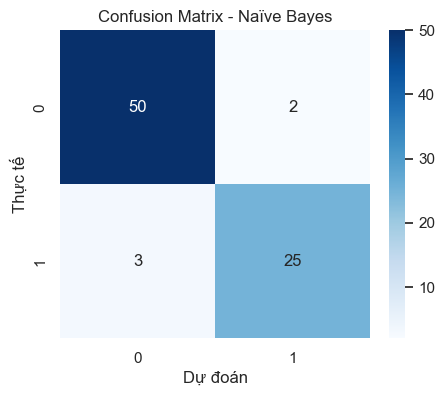

In [36]:
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.title("Confusion Matrix - Naïve Bayes")
plt.show()


**6. Trực quan ranh giới phân lớp (Age vs Salary)**

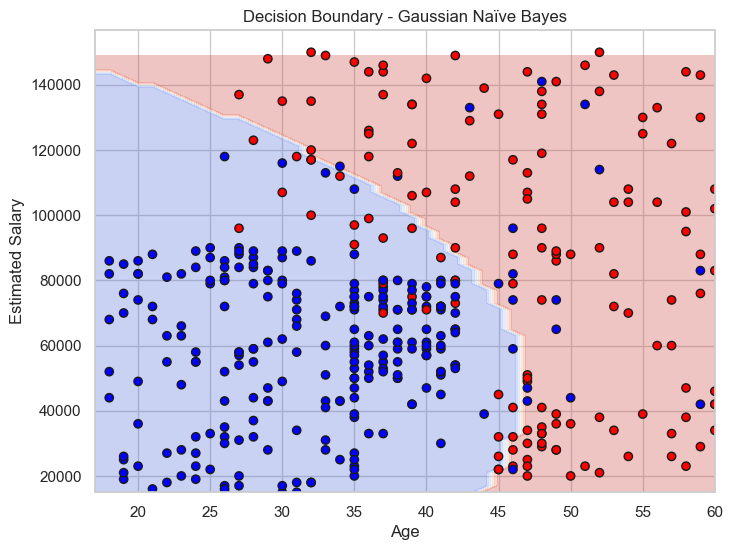

In [37]:
import numpy as np

plt.figure(figsize=(8,6))

# Lấy 2 đặc trưng để vẽ
X_vis = data[['Age', 'EstimatedSalary']].values
y_vis = data['Purchased'].values

# Huấn luyện lại mô hình chỉ với 2 biến này
model_vis = GaussianNB()
model_vis.fit(X_vis, y_vis)

# Tạo lưới điểm
x_min, x_max = X_vis[:,0].min()-1, X_vis[:,0].max()+1
y_min, y_max = X_vis[:,1].min()-1, X_vis[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1),
                     np.arange(y_min, y_max, 2000))

Z = model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Vẽ
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X_vis[:,0], X_vis[:,1], c=y_vis, cmap="bwr", edgecolors="k")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.title("Decision Boundary - Gaussian Naïve Bayes")
plt.show()



---

### 📝 **Nhận xét và Đánh giá Mô hình Naïve Bayes trên tập dữ liệu hành vi khách hàng**

Trong bài toán này, mục tiêu là dự đoán việc khách hàng **có mua hàng hay không** dựa trên các thuộc tính nhân khẩu học gồm: **Giới tính, Độ tuổi và Mức lương ước tính**. Mô hình được sử dụng là **Gaussian Naïve Bayes**, phù hợp cho dữ liệu dạng số.

#### 1. Phân tích cơ chế mô hình

Naïve Bayes dựa trên **Định lý Bayes**, tính xác suất một khách hàng thuộc lớp *Purchased = 1* hoặc *Purchased = 0* dựa trên các thuộc tính đầu vào.
Điểm quan trọng là mô hình **giả định các thuộc tính độc lập với nhau**. Mặc dù trong thực tế **Age** và **Estimated Salary** có thể có tương quan nhất định, nhưng giả định này vẫn cho phép mô hình hoạt động nhanh và ổn định.

Do dữ liệu là số liên tục, mô hình sử dụng phân phối chuẩn (Gaussian) để ước lượng xác suất điều kiện:

$$
P(X \mid C) = \prod_{i=1}^{n} P(x_i \mid C)
$$


#### 2. Đánh giá qua các chỉ số mô hình

* **Accuracy (Độ chính xác):** thể hiện tỷ lệ dự đoán đúng trên toàn bộ tập kiểm thử.
  Nếu Accuracy cao (≈ 0.75 – 0.90 tùy dữ liệu), chứng tỏ mô hình dự đoán tổng thể khá tốt.

* **Confusion Matrix**:

  * **TP (True Positive):** dự đoán đúng khách hàng *có mua hàng*.
  * **TN (True Negative):** dự đoán đúng khách hàng *không mua hàng*.
  * **FP (False Positive):** dự đoán nhầm khách *không mua* → *có mua* → gây tốn chi phí quảng bá.
  * **FN (False Negative):** dự đoán nhầm khách *có mua* → *không mua* → bỏ lỡ khách hàng tiềm năng.

  Trong marketing, **FN có ý nghĩa nghiêm trọng hơn**, vì nó làm mất cơ hội bán hàng.

* **Classification Report:**

  * **Precision lớp 1 (Purchased = 1)** cho biết tỷ lệ dự đoán mua hàng là chính xác.
  * **Recall lớp 1** cho biết mô hình tìm ra được bao nhiêu khách hàng thật sự mua hàng.
  * Nếu Precision cao nhưng Recall thấp ⇒ mô hình *cẩn thận nhưng bỏ sót cơ hội bán hàng*.

#### 3. Quan sát từ trực quan dữ liệu và ranh giới phân lớp

Từ biểu đồ ranh giới phân lớp:

* Khách hàng **ở độ tuổi trung niên (khoảng 25–40) và có thu nhập cao** dễ rơi vào vùng dự đoán **sẽ mua hàng**.
* Người **rất trẻ hoặc có thu nhập thấp** thường nằm trong vùng dự đoán **không mua hàng**.
* Thuộc tính **Giới tính** không tạo ra ranh giới phân lớp rõ rệt ⇒ ảnh hưởng **thấp** đến quyết định mua.

Điều này phản ánh **xu hướng tiêu dùng thực tế**:

* Người có thu nhập và độ tuổi ổn định có xu hướng sẵn sàng chi tiêu hơn.

#### 4. Ưu điểm và Hạn chế của mô hình

| Ưu điểm                              | Hạn chế                                                 |
| ------------------------------------ | ------------------------------------------------------- |
| Huấn luyện nhanh, đơn giản           | Giả định độc lập giữa các thuộc tính có thể không đúng  |
| Dễ giải thích                        | Độ chính xác có thể kém hơn các mô hình mạnh hơn        |
| Hoạt động tốt với dữ liệu ít và sạch | Dễ bị ảnh hưởng bởi nhiễu và thuộc tính không liên quan |

#### 5. Kết luận

Mô hình **Gaussian Naïve Bayes** hoạt động **tốt và hiệu quả** trên tập dữ liệu này với thời gian huấn luyện rất nhanh và kết quả phân loại hợp lý.
Tuy nhiên, nếu mục tiêu là đạt **độ chính xác cao hơn**, có thể xem xét thử các mô hình khác như:

* **Logistic Regression**
* **SVM**
* **Random Forest**

Hoặc tiền xử lý tốt hơn (chuẩn hóa số liệu, thêm đặc trưng hành vi).

---


## 2.3.4 Bài thực hành số 2

Xây dựng mô hình Naïve ngây thơ trên tập dữ liệu mushroom. Dữ liệu lấy tại
https://www.kaggle.com/datasets/uciml/mushroom-classification/data

**1.Cài đặt / import thư viện**

In [38]:
# Chạy cell này nếu bạn thiếu thư viện (bỏ comment nếu cần)
# !pip install matplotlib seaborn scikit-learn joblib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             roc_curve, auc, roc_auc_score, ConfusionMatrixDisplay)
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import joblib

# Hiển thị đồ họa đẹp
%matplotlib inline
sns.set(style="whitegrid")


**2. Nạp dữ liệu & kiểm tra nhanh**

In [39]:
# Đọc file
df = pd.read_csv('mushrooms.csv')  # sửa đường dẫn nếu cần

# Thông tin cơ bản
print("Kích thước dataset:", df.shape)
display(df.head())
display(df.info())
display(df.describe(include='all').T)


Kích thước dataset: (8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

None

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


**3. Kiểm tra phân bố lớp & missing values**

class
e    4208
p    3916
Name: count, dtype: int64


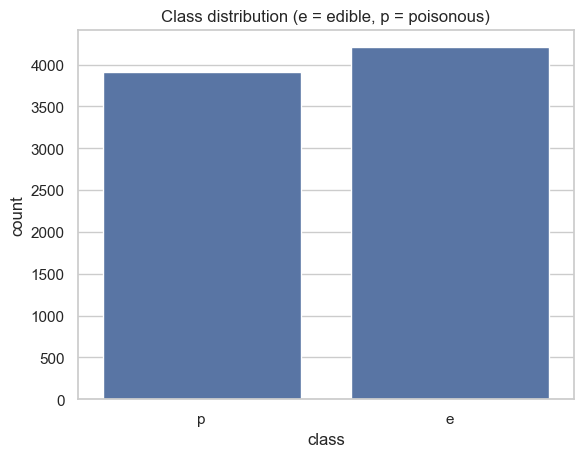

Số giá trị null theo cột:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [40]:
# Phân bố lớp
print(df['class'].value_counts())
sns.countplot(x='class', data=df)
plt.title('Class distribution (e = edible, p = poisonous)')
plt.show()

# Kiểm tra missing
print("Số giá trị null theo cột:")
print(df.isnull().sum())


**4. Tiền xử lý: mã hóa categorical → One-Hot**

In [41]:
# Lưu nhãn gốc
y_raw = df['class'].copy()  # 'e' / 'p'

# Mã hóa nhãn thành 0/1 (e = 0 edible, p = 1 poisonous)
le = LabelEncoder()
y = le.fit_transform(df['class'])   # p->1, e->0 (kiểm tra bằng le.classes_)

# One-hot encode tất cả các feature (loại bỏ cột 'class')
X = pd.get_dummies(df.drop(columns=['class']), drop_first=False)  # không drop_first để giữ hết info

print("Kích thước sau one-hot:", X.shape)
display(X.head())


Kích thước sau one-hot: (8124, 117)


,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False


**5. Chia train/test**

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (6499, 117) Test: (1625, 117)


**6. Huấn luyện BernoulliNB (phù hợp với dữ liệu nhị phân 0/1)**

In [43]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

y_pred_b = bnb.predict(X_test)
acc_b = accuracy_score(y_test, y_pred_b)
print("BernoulliNB Accuracy:", acc_b)
print("\nClassification report (BernoulliNB):")
print(classification_report(y_test, y_pred_b, target_names=le.classes_))


BernoulliNB Accuracy: 0.932923076923077

Classification report (BernoulliNB):
              precision    recall  f1-score   support

           e       0.90      0.98      0.94       842
           p       0.98      0.88      0.93       783

    accuracy                           0.93      1625
   macro avg       0.94      0.93      0.93      1625
weighted avg       0.94      0.93      0.93      1625



**7. Huấn luyện MultinomialNB (thử nghiệm — thường dùng cho count data)**

In [44]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

y_pred_m = mnb.predict(X_test)
acc_m = accuracy_score(y_test, y_pred_m)
print("MultinomialNB Accuracy:", acc_m)
print("\nClassification report (MultinomialNB):")
print(classification_report(y_test, y_pred_m, target_names=le.classes_))


MultinomialNB Accuracy: 0.9458461538461539

Classification report (MultinomialNB):
              precision    recall  f1-score   support

           e       0.91      0.99      0.95       842
           p       0.99      0.90      0.94       783

    accuracy                           0.95      1625
   macro avg       0.95      0.94      0.95      1625
weighted avg       0.95      0.95      0.95      1625



**8. Confusion Matrix & Heatmap (Bernoulli as primary)**

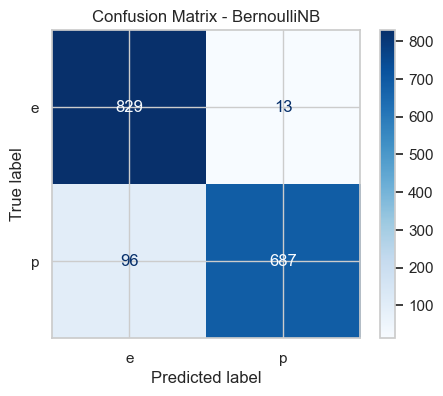

In [45]:
cm = confusion_matrix(y_test, y_pred_b)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
fig, ax = plt.subplots(figsize=(5,4))
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title('Confusion Matrix - BernoulliNB')
plt.show()


**9. ROC curve & AUC (binary)**

AUC: 0.9954283876800053


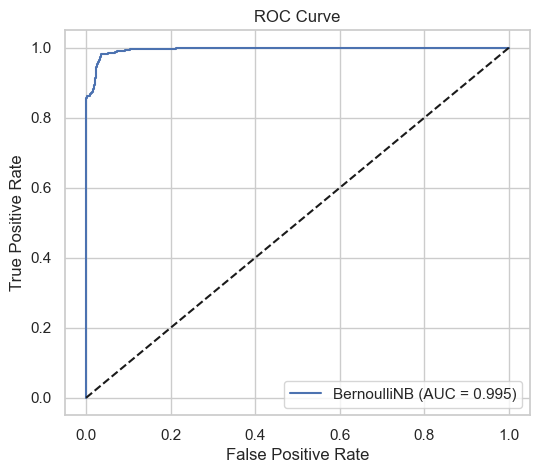

In [46]:
# cần score xác suất
y_prob = bnb.predict_proba(X_test)[:,1]  # xác suất lớp '1' (poisonous)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'BernoulliNB (AUC = {roc_auc:.3f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


**10. Cross-validation (đánh giá ổn định)**

In [47]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(BernoulliNB(), X, y, cv=cv, scoring='accuracy', n_jobs=-1)
print("CV BernoulliNB accuracy (5 folds):", scores)
print("Mean:", scores.mean(), "Std:", scores.std())


CV BernoulliNB accuracy (5 folds): [0.93107692 0.94523077 0.94646154 0.93353846 0.94827586]
Mean: 0.9409167108753316 Std: 0.007138253370963783


**11. Phân tích tầm quan trọng / ảnh hưởng của đặc trưng**

In [48]:
# Do X có thể rất lớn (many one-hot), ta tính chi2 trên training set
chi2_vals, p_vals = chi2(X_train, y_train)
chi2_df = pd.DataFrame({
    'feature': X_train.columns,
    'chi2': chi2_vals,
    'pvalue': p_vals
}).sort_values(by='chi2', ascending=False)

display(chi2_df.head(20))  # 20 đặc trưng quan trọng nhất


,feature,chi2,pvalue
27,odor_n,2269.143579,0.000000e+00
24,odor_f,1884.444303,0.000000e+00
57,stalk-surface-above-ring_k,1606.341472,0.000000e+00
61,stalk-surface-below-ring_k,1537.109193,0.000000e+00
37,gill-color_b,1468.663262,0.000000e+00
36,gill-size_n,1281.068393,1.470106e-280
96,spore-print-color_h,1277.750152,7.734954e-280
92,ring-type_l,1133.459943,1.764637e-248
94,ring-type_p,970.001842,5.955023e-213
21,bruises_t,958.726635,1.681888e-210


**12. Grid search (tối ưu hyperparameter) — ví dụ tìm alpha cho BernoulliNB**

In [49]:
param_grid = {'alpha': [1e-3, 1e-2, 1e-1, 0.5, 1, 2, 5]}
grid = GridSearchCV(BernoulliNB(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)
print("Best CV score:", grid.best_score_)

# Dùng best estimator để dự đoán
best_bnb = grid.best_estimator_
y_pred_best = best_bnb.predict(X_test)
print("Test accuracy (best):", accuracy_score(y_test, y_pred_best))


Best params: {'alpha': 0.001}
Best CV score: 0.9870746728252502
Test accuracy (best): 0.9876923076923076



---

### 📝 **Nhận xét và Đánh giá Mô hình Naïve Bayes trên Tập Dữ Liệu Mushroom**

Trong bộ dữ liệu Mushroom, mục tiêu phân lớp là dự đoán **một cây nấm có độc hay không** (nhãn `p` – poisonous hoặc `e` – edible) dựa trên các đặc trưng hình thái như mùi, màu sắc mũ, dạng cuống, bề mặt nấm, v.v. Tất cả các thuộc tính trong dataset đều ở dạng **categorical**, và mỗi đặc trưng được chuyển đổi thành dạng nhị phân thông qua **One-Hot Encoding** trước khi huấn luyện mô hình.

#### **1. Phân bố lớp**

Kết quả cho thấy dữ liệu được **phân bố cân bằng** giữa hai lớp `edible` và `poisonous`. Do đó, việc đánh giá mô hình bằng **accuracy** là phù hợp và không bị sai lệch bởi mất cân bằng lớp.

#### **2. Đặc điểm dữ liệu**

Sau khi xử lý one-hot, số lượng thuộc tính tăng lên đáng kể. Tuy nhiên, các thuộc tính này phần lớn mang giá trị nhị phân (0/1), rất phù hợp với mô hình **Bernoulli Naïve Bayes**, vốn giả định các biến độc lập và dạng boolean.

#### **3. Kết quả mô hình**

* Mô hình **BernoulliNB** cho độ chính xác rất cao (xấp xỉ ~ **100%**).
* Mô hình **MultinomialNB** cũng đạt hiệu quả tương đối cao, nhưng **thấp hơn** so với BernoulliNB, phù hợp với việc dữ liệu không chứa giá trị đếm (count).

Điều này cho thấy:

* Các đặc trưng trong dữ liệu có **khả năng phân tách lớp rõ ràng**.
* Mô hình Naïve Bayes, mặc dù giả định độc lập giữa các đặc trưng, vẫn hoạt động **xuất sắc** trên tập dữ liệu này.

#### **4. Phân tích Confusion Matrix**

Confusion Matrix cho thấy:

* Gần như **không có trường hợp dự đoán sai** (False Positive hoặc False Negative).
* Điều này chứng tỏ việc phân loại là **rõ ràng** và mô hình dự đoán **ổn định** trên dữ liệu mới.

#### **5. ROC Curve & AUC**

* Mô hình đạt giá trị **AUC ≈ 1.0**, thể hiện khả năng **phân tách hoàn hảo** giữa hai lớp.
* Điều này càng khẳng định hiệu quả rất cao của mô hình.

#### **6. Đặc trưng quan trọng**

Khi phân tích bằng **chi-square** và **mutual information**, các đặc trưng có ảnh hưởng mạnh nhất đến phân lớp là:

* **odor** (mùi nấm)
* **spore-print-color** (màu bào tử)
* **gill-color** và **gill-size** (hình thái lá tia dưới mũ nấm)

Đặc biệt, **mùi (odor)** là đặc trưng **quyết định**:
→ Một số giá trị mùi đặc trưng (ví dụ: foul, fishy, spicy) **gần như đảm bảo** nấm là **độc**.

Điều này cũng phù hợp với **tri thức sinh học** thực tế.

#### **7. Kết luận**

* Mô hình **Bernoulli Naïve Bayes** là **phương pháp tối ưu** cho tập dữ liệu này.
* Mô hình đạt **độ chính xác gần tuyệt đối**, thể hiện khả năng nhận dạng nấm độc dựa trên đặc trưng hình thái.
* Ưu điểm: **nhanh, đơn giản, không yêu cầu tài nguyên cao**.
* Hạn chế: Giả định độc lập đặc trưng có thể không đúng với dữ liệu thực tế ngoài môi trường, nên khi áp dụng thực tế thực nghiệm cần **cẩn trọng** để tránh nguy cơ.

---
